# LAB 09: Degree correlation - part 2
 -  
August 23th 2022

* This is a python tutorial on the degree correlation of networks.
* There is no marking for this tutorial. You do not need to submit your solution to us, but this exercise will help you to start working on your project
* In the begining of this tutorial you will find a similar code than used in the class. In the end, there are exercises for you.
* We recommend you to solve this lab until next wednesday (August 30th).

## Degree correlation function

* Load the protein.edgelist network from http://networksciencebook.com/translations/en/resources/networks.zip
* Compute the degree correlation function of the PPI network.
* Plot the degree function
* Is the network assortative, neutral or dissortative?

In [ ]:
!wget http://networksciencebook.com/translations/en/resources/networks.zip
!unzip networks.zip

--2022-08-23 19:55:04--  http://networksciencebook.com/translations/en/resources/networks.zip
Resolving networksciencebook.com (networksciencebook.com)... 166.62.76.227
Connecting to networksciencebook.com (networksciencebook.com)|166.62.76.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141043055 (135M) [application/zip]
Saving to: ‘networks.zip’

networks.zip        100%[===================>] 134.51M  38.5MB/s    in 4.9s    

2022-08-23 19:55:09 (27.2 MB/s) - ‘networks.zip’ saved [141043055/141043055]

Archive:  networks.zip
  inflating: actor.edgelist.txt      
  inflating: citation.edgelist.txt   
  inflating: collaboration.edgelist.txt  
  inflating: email.edgelist.txt      
  inflating: internet.edgelist.txt   
  inflating: metabolic.edgelist.txt  
  inflating: phonecalls.edgelist.txt  
  inflating: powergrid.edgelist.txt  
  inflating: protein.edgelist.txt    
  inflating: www.edgelist.txt        


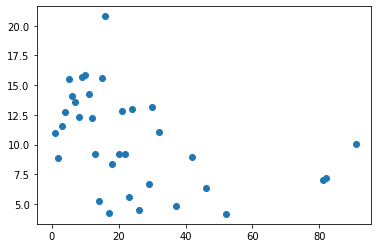

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.read_edgelist("protein.edgelist.txt")

def degree_correlation_function(G):
  G = nx.convert_node_labels_to_integers(G)
  degrees = np.array(G.degree())[:,1].astype(int)
  knn_i = np.array([])
  for node in G.nodes:
    neighbors = list(G.neighbors(node))
    if len(neighbors) > 0:
      knn_i = np.append(knn_i, np.mean(degrees[neighbors]))
    else:
      knn_i = np.append(knn_i, 0)
  knn = np.array([])
  for k in range(max(degrees)+1):
    sel_nodes = np.where(degrees == k)[0]
    if len(sel_nodes) > 0:
      knn = np.append(knn, np.mean(knn_i[sel_nodes]))
    else:
      knn = np.append(knn, None)
  return knn

degrees = np.array(G.degree())[:,1].astype(int)
knn = degree_correlation_function(G)
x = list(range(max(degrees)+1))
plt.scatter(x, knn)

## Randomization and degree correlations

* Create a randomization function that preserves the degree distribution and generates simple graphs (with no multiple edges)

* Compare the degree correlation function of the observed graph, and the two randomization procedures


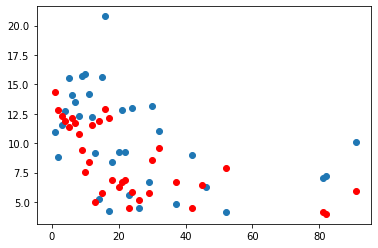

In [ ]:
import random

def degree_preserving(G_orig):
    G = G_orig.copy()
    edges = G_orig.edges
    for edge in edges:
        v1 = edge[0]
        v2 = edge[1]
        if G.has_edge(v1, v2):
            possible_edges = [e for e in G.edges 
                              if set(e) != set(edge)
                             and not G.has_edge(v1, e[1]) 
                             and not G.has_edge(e[0], v2)]
            sel_edge = random.sample(possible_edges, 1)[0]
            G.remove_edge(v1, v2)
            G.remove_edge(sel_edge[0], sel_edge[1])
            G.add_edge(v1, sel_edge[1])
            G.add_edge(sel_edge[0], v2)
    return G

G2 = degree_preserving(G)
knn2 = degree_correlation_function(G2)

plt.scatter(x, knn)
plt.scatter(x, knn2, color='r')

## Generating correlated netwoks

Implement the Xulvi-Brunet and Sokolov process to generate maximilly correlated networks.

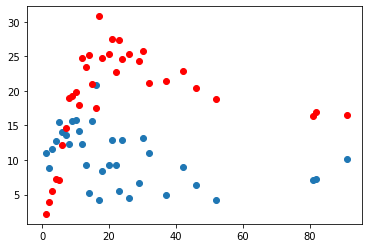

In [ ]:
def generate_correlated_graph(G_orig):
  G_orig = nx.convert_node_labels_to_integers(G_orig)
  G = G_orig.copy()
  edges = list(G_orig.edges)
  for edge in edges:
    v1 = edge[0]
    v2 = edge[1]
    degrees = np.array(G.degree())[:,1].astype(int)
    if G.has_edge(v1, v2):
      possible_edges = list(G.edges)
      while possible_edges != []:
        sel_edge = random.sample(possible_edges, 1)[0]
        sel_vertices = [v1, v2, sel_edge[0], sel_edge[1]]
        sel_degrees = degrees[sel_vertices]
        index = np.argsort(sel_degrees)
        a = sel_vertices[index[3]]
        b = sel_vertices[index[2]]
        c = sel_vertices[index[1]]
        d = sel_vertices[index[0]]
        if a != b and c != d and not G.has_edge(a,b) and not G.has_edge(c,d):
          G.remove_edge(v1, v2)
          G.remove_edge(sel_edge[0], sel_edge[1])
          G.add_edge(a, b)
          G.add_edge(c, d)
          possible_edges = []
        else:
          possible_edges.remove(sel_edge)
  return G    

G3 = generate_correlated_graph(G)
knn3 = degree_correlation_function(G3)

plt.scatter(x, knn)
plt.scatter(x, knn3, color='r')


## Exercise 

* Implement a procedure that transforms a given network into a more dissortative network

* Compute the degree correlation function for the network in your project. Is it dissortative, assortative or neutral?



In [ ]:
# Write your code here
